In [311]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\maram\Downloads\(user_item_matrix 150x20)(in).csv"

df = pd.read_csv(file_path, index_col=0)

# Preprocessing - Replace 0 with NaN for missing values (scale is 1-5)
data_matrix = df.replace(0, np.nan).values
num_users, num_items = data_matrix.shape

# Display and print basic statistics and structure
dataset_stats = {
    "Shape": df.shape,  # Rows (users) x Columns (items)
    "Data Types": df.dtypes.to_dict(),
    "Missing Values": df.isnull().sum().sum(),
    "Summary": df.describe()
}

print("Dataset Shape:", dataset_stats["Shape"])
print("\nData Types:\n", dataset_stats["Data Types"])
print("\nDataset Summary:\n", dataset_stats["Summary"])
print("\nFirst 10 rows of the dataset:\n", df.head(10))


Dataset Shape: (150, 20)

Data Types:
 {'Movie 1': dtype('int64'), 'Movie 2': dtype('int64'), 'Movie 3': dtype('int64'), 'Movie 4': dtype('int64'), 'Movie 5': dtype('int64'), 'Movie 6': dtype('int64'), 'Movie 7': dtype('int64'), 'Movie 8': dtype('int64'), 'Movie 9': dtype('int64'), 'Movie 10': dtype('int64'), 'Movie 11': dtype('int64'), 'Movie 12': dtype('int64'), 'Movie 13': dtype('int64'), 'Movie 14': dtype('int64'), 'Movie 15': dtype('int64'), 'Movie 16': dtype('int64'), 'Movie 17': dtype('int64'), 'Movie 18': dtype('int64'), 'Movie 19': dtype('int64'), 'Movie 20': dtype('int64')}

Dataset Summary:
           Movie 1     Movie 2     Movie 3     Movie 4     Movie 5     Movie 6  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     2.300000    2.420000    2.386667    2.540000    2.320000    2.480000   
std      1.681921    1.627243    1.725399    1.834165    1.660112    1.673801   
min      0.000000    0.000000    0.000000    0.000000    0.000000 

In [312]:
# Step 3: Count the total number of users and items
tnu = df.shape[0]  # (users)
tni = df.shape[1]  # (items)

print(f"Total Number of Users (tnu): {tnu}")
print(f"Total Number of Items (tni): {tni}")


Total Number of Users (tnu): 150
Total Number of Items (tni): 20


In [313]:
# Step 4: Count the number of ratings for every product (non-zero ratings)
ratings_per_item = (df != 0).sum(axis=0)

# Display the results
print("Number of Ratings for Each Item:")
print(ratings_per_item)

# Save the results to a csv file
ratings_per_item.to_csv("ratings_per_item.csv", header=["Number of Ratings"])


Number of Ratings for Each Item:
Movie 1     117
Movie 2     124
Movie 3     119
Movie 4     116
Movie 5     121
Movie 6     124
Movie 7     140
Movie 8     128
Movie 9     126
Movie 10    130
Movie 11    121
Movie 12    118
Movie 13    113
Movie 14    119
Movie 15    148
Movie 16    133
Movie 17    113
Movie 18    118
Movie 19    107
Movie 20    110
dtype: int64


In [314]:
# Recalculate missing ratings to ensure correctness
missing_ratings = (df == 0).sum(axis=1)

# Now let's ensure that we select users with exactly 2, 3, and 5 missing ratings
U1 = missing_ratings[missing_ratings == 2].index[0] if (missing_ratings == 2).any() else None
U2 = missing_ratings[missing_ratings == 3].index[0] if (missing_ratings == 3).any() else None
U3 = missing_ratings[missing_ratings == 5].index[0] if (missing_ratings == 5).any() else None

print("Selected Active Users:")
print(f"User with 2 missing ratings (U1): {U1}")
print(f"User with 3 missing ratings (U2): {U2}")
print(f"User with 5 missing ratings (U3): {U3}")

Selected Active Users:
User with 2 missing ratings (U1): 5
User with 3 missing ratings (U2): 19
User with 5 missing ratings (U3): 2


In [315]:
# Step 6: Identify items with specific missing ratings percentages
total_users = df.shape[0]
missing_ratings_item = (df == 0).sum(axis=0)  # Count missing ratings for each item
missing_percentage = (missing_ratings_item / total_users) * 100  # Missing ratings as percentage

# Find the closest items to 4% and 10% missing ratings
closest_4_percent_index = (missing_percentage - 4).abs().argmin()
closest_10_percent_index = (missing_percentage - 10).abs().argmin()

# Get the corresponding item names for the closest percentages
I1_closest = missing_percentage.index[closest_4_percent_index]
I2_closest = missing_percentage.index[closest_10_percent_index]

# Display the selected items and their missing percentages
print("Selected Target Items:")
print(f"Item with closest to 4% missing ratings (I1): {I1_closest} with {missing_percentage[I1_closest]:.2f}%")
print(f"Item with closest to 10% missing ratings (I2): {I2_closest} with {missing_percentage[I2_closest]:.2f}%")


Selected Target Items:
Item with closest to 4% missing ratings (I1): Movie 15 with 1.33%
Item with closest to 10% missing ratings (I2): Movie 16 with 11.33%


In [316]:
# Step 7: Count co-rated users and co-rated items for active users
active_users = [U1, U2, U3]

# Function to count co-rated users and items
def count_co_rated_items(user, df):
    user_ratings = df.loc[user] > 0  # Items rated by the active user
    co_users = (df.loc[:, user_ratings] > 0).sum(axis=1) > 0  # Users who co-rated at least one item
    co_rated_items = user_ratings.sum()  # Total number of items rated by the active user
    return co_users.sum() - 1, co_rated_items  # Subtract 1 to exclude the user themselves

# Compute co-rated stats for each active user
co_rated_stats = {}
for user in active_users:
    no_common_users, no_co_rated_items = count_co_rated_items(user, df)
    co_rated_stats[user] = {"No_common_users": no_common_users, "No_coRated_items": no_co_rated_items}


print("Co-rated Users and Items for Active Users:")
for user, stats in co_rated_stats.items():
    print(f"User {user}:")
    print(f"  Number of Common Users (No_common_users): {stats['No_common_users']}")
    print(f"  Number of Co-rated Items (No_coRated_items): {stats['No_coRated_items']}")


Co-rated Users and Items for Active Users:
User 5:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 18
User 19:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 17
User 2:
  Number of Common Users (No_common_users): 149
  Number of Co-rated Items (No_coRated_items): 15


In [317]:
import numpy as np

# Step 8: Create a 2-D array
# Extract No_common_users and No_coRated_items
no_common_users = [co_rated_stats[user]["No_common_users"] for user in active_users]
no_coRated_items = [co_rated_stats[user]["No_coRated_items"] for user in active_users]

# Sort based on No_common_users in descending order
sorted_stats = sorted(zip(no_common_users, no_coRated_items), key=lambda x: -x[0])

# Create a 2-D NumPy array
co_rated_array = np.array(sorted_stats)

print("2-D Array (No_common_users, No_coRated_items):")
print(co_rated_array)

# Save the 2-D array to a CSV file
array_output_path = "co_rated_stats_array.csv"
np.savetxt(array_output_path, co_rated_array, delimiter=",", header="No_common_users,No_coRated_items", comments='', fmt='%d')

print(f"\n2-D array saved to: {array_output_path}")


2-D Array (No_common_users, No_coRated_items):
[[149  18]
 [149  17]
 [149  15]]

2-D array saved to: co_rated_stats_array.csv


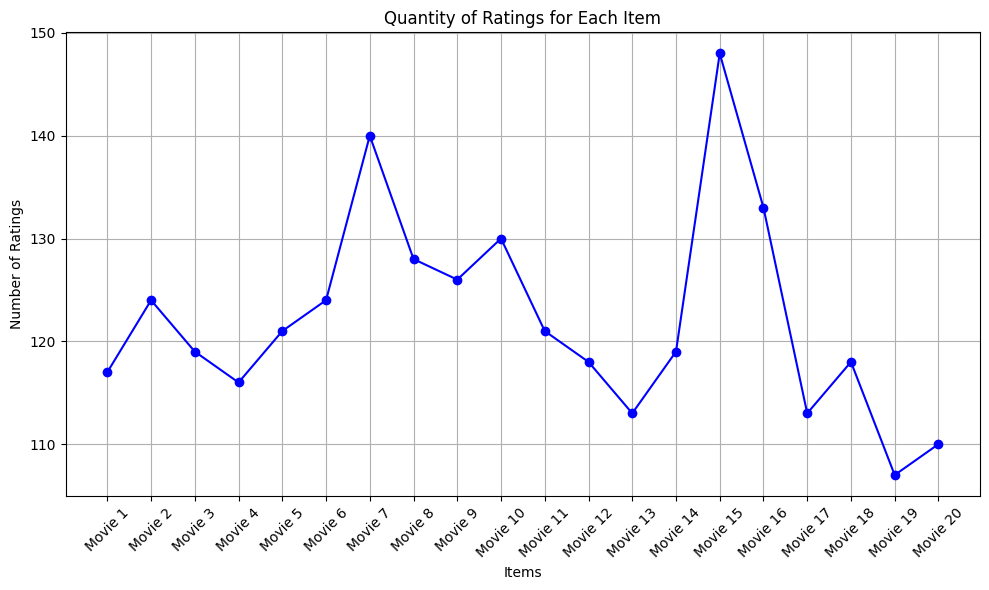

Curve saved as: ratings_quantity_curve.png


In [318]:
import matplotlib.pyplot as plt

# Step 9: Calculate the number of ratings for each item
ratings_per_item = (df != 0).sum(axis=0)

# Plot the ratings as a curve
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-', color='b')
plt.title("Quantity of Ratings for Each Item")
plt.xlabel("Items")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.tight_layout()

plot_output_path = "ratings_quantity_curve.png"
plt.savefig(plot_output_path)

plt.show()

print(f"Curve saved as: {plot_output_path}")


In [319]:
# Step 10: Calculate threshold β for each active user
def calculate_threshold_beta(user, df, percentage=0.3):
    # Get items rated by the active user
    user_rated_items = df.loc[user] > 0
    total_items_rated = user_rated_items.sum()
    
    # Determine the minimum number of items for the threshold (30% of total items rated)
    threshold_items = int(percentage * total_items_rated)
    
    # Count users who have co-rated at least the threshold number of items
    co_users = (df.loc[:, user_rated_items] > 0).sum(axis=1)
    max_users = (co_users >= threshold_items).sum() -1
    
    return max_users

threshold_beta = {}
for user in active_users:
    beta = calculate_threshold_beta(user, df, percentage=0.3)
    threshold_beta[user] = beta

print("Threshold β for Each Active User:")
for user, beta in threshold_beta.items():
    print(f"User {user}: Threshold β = {beta}")


Threshold β for Each Active User:
User 5: Threshold β = 149
User 19: Threshold β = 149
User 2: Threshold β = 149


In [320]:
import json
import numpy as np

# Function to clean data for JSON serialization
def clean_json_serializable(obj):
    if isinstance(obj, dict):
        return {str(k): clean_json_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [clean_json_serializable(i) for i in obj]
    elif isinstance(obj, (np.integer, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64)):
        return float(obj)
    else:
        return obj

# Combine all results into a dictionary
results = {
    "Total Users (tnu)": tnu,
    "Total Items (tni)": tni,
    "Ratings per Item": ratings_per_item.to_dict(),
    "Active Users": {
        "U1": U1,
        "U2": U2,
        "U3": U3
    },
    "Target Items": {
        "I1": I1,
        "I2": I2
    },
    "Co-rated Stats": co_rated_stats,
    "Threshold β": threshold_beta,
    "2D Array": co_rated_array.tolist()
}

# Clean the results for JSON compatibility
results_cleaned = clean_json_serializable(results)

# Save the cleaned results to a JSON file
output_file_path = "final_assignment_results.json"
with open(output_file_path, "w") as json_file:
    json.dump(results_cleaned, json_file, indent=4)

print(f"All results have been successfully saved to: {output_file_path}")


All results have been successfully saved to: final_assignment_results.json


Casa Study 1.1


In [321]:
from scipy.spatial.distance import cosine

def compute_cosine_similarity(user_matrix, active_user_idx):
   
    active_user = np.nan_to_num(user_matrix[active_user_idx])
    similarities = []
    for user_idx, user in enumerate(user_matrix):
        if user_idx != active_user_idx:  # Exclude self-comparison
            sim = 1 - cosine(active_user, np.nan_to_num(user))
            similarities.append((user_idx, sim))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

def top_20_percent(similarities):
   
    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

def predict_ratings(user_matrix, active_user_idx, top_users):
    
    active_user = user_matrix[active_user_idx]
    predictions = {}
    for item_idx in range(user_matrix.shape[1]):
        if np.isnan(active_user[item_idx]):  # Missing rating
            num, den = 0, 0
            for user_idx, sim in top_users:
                if not np.isnan(user_matrix[user_idx][item_idx]):
                    num += sim * user_matrix[user_idx][item_idx]
                    den += abs(sim)
            predictions[item_idx] = num / den if den != 0 else 0  # Avoid division by zero
    return predictions

def compute_discounted_similarity(similarities, beta):
    
    return [(user_idx, sim * beta) for user_idx, sim in similarities]

# Main process for active users
results = {}
for active_user_idx in active_users:
    print_formatted_output(f"Processing Active User {active_user_idx}", "")

    # 1.1.1 Compute Cosine Similarity
    cosine_similarities = compute_cosine_similarity(data_matrix, active_user_idx)
    similarities_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in cosine_similarities[:5]])
    print_formatted_output("Top Cosine Similarities", similarities_output)

    # 1.1.2 Top 20% closest users
    top_users = top_20_percent(cosine_similarities)
    top_users_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_users])
    print_formatted_output("Top 20% Closest Users", top_users_output)

    # 1.1.3 Predict Ratings
    predictions = predict_ratings(data_matrix, active_user_idx, top_users)
    predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions.items()])
    print_formatted_output("Predicted Ratings for Missing Items", predictions_output)

    # 1.1.4 Compute Discount Factor and Discounted Similarity
    beta = 0.8
    discounted_similarities = compute_discounted_similarity(top_users, beta)
    ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in discounted_similarities])
    print_formatted_output("Discounted Similarities", ds_output)

    # 1.1.5 Top 20% with Discounted Similarity
    top_discounted_users = top_20_percent(discounted_similarities)
    top_ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_discounted_users])
    print_formatted_output("Top 20% Closest Users with Discounted Similarity", top_ds_output)

    # 1.1.6 Predict Ratings with Discounted Similarity
    discounted_predictions = predict_ratings(data_matrix, active_user_idx, top_discounted_users)
    discounted_predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions.items()])
    print_formatted_output("Predicted Ratings with Discounted Similarity", discounted_predictions_output)

    # Save results
    results[active_user_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Compare Results
comparison_output = ""
for user_idx in active_users:
    comparison_output += f"\nUser {user_idx}:\n"
    comparison_output += "Original Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["predictions"].items()])
    comparison_output += "\nDiscounted Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["discounted_predictions"].items()])
print_formatted_output("Comparing Predictions", comparison_output)



Processing Active User 5


Top Cosine Similarities
User 129: 0.8603
User 30: 0.8522
User 78: 0.8154
User 77: 0.8061
User 73: 0.8020

Top 20% Closest Users
User 129: 0.8603
User 30: 0.8522
User 78: 0.8154
User 77: 0.8061
User 73: 0.8020
User 82: 0.7892
User 119: 0.7885
User 148: 0.7884
User 136: 0.7759
User 48: 0.7721
User 33: 0.7693
User 53: 0.7693
User 93: 0.7682
User 104: 0.7666
User 118: 0.7663
User 56: 0.7594
User 120: 0.7590
User 100: 0.7574
User 45: 0.7553
User 57: 0.7493
User 83: 0.7469
User 36: 0.7466
User 24: 0.7449
User 101: 0.7449
User 12: 0.7429
User 130: 0.7418
User 25: 0.7407
User 140: 0.7406
User 90: 0.7373

Predicted Ratings for Missing Items
Movie 2: 2.95
Movie 5: 2.43
Movie 6: 2.41
Movie 17: 2.58

Discounted Similarities
User 129: 0.6882
User 30: 0.6818
User 78: 0.6523
User 77: 0.6449
User 73: 0.6416
User 82: 0.6314
User 119: 0.6308
User 148: 0.6307
User 136: 0.6207
User 48: 0.6176
User 33: 0.6154
User 53: 0.6154
User 93: 0.6146
User 104: 0.6132
User 118: 0.6130
User

Case Study 1.2


In [322]:


# 1.2.1 Compute mean-centered cosine similarity
def compute_mean_centered_similarity(user_matrix, active_user_idx):
    """Compute mean-centered cosine similarity between active user and other users."""
    active_user = user_matrix[active_user_idx]
    mean_active_user = np.nanmean(active_user)
    similarities = []
    for user_idx, user in enumerate(user_matrix):
        if user_idx != active_user_idx:
            user_mean = np.nanmean(user)
            centered_active_user = np.nan_to_num(active_user - mean_active_user)
            centered_user = np.nan_to_num(user - user_mean)
            sim = 1 - cosine(centered_active_user, centered_user)
            similarities.append((user_idx, sim))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# 1.2.2 Top 20% closest users
def top_20_percent(similarities):
    """Return top 20% of users based on similarity."""
    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

# 1.2.3 Predict ratings using mean-centered similarity
def predict_ratings_mean_centered(user_matrix, active_user_idx, top_users):
    """Predict missing ratings for active user using mean-centered data."""
    active_user = user_matrix[active_user_idx]
    mean_active_user = np.nanmean(active_user)
    predictions = {}
    for item_idx in range(user_matrix.shape[1]):
        if np.isnan(active_user[item_idx]):
            num, den = 0, 0
            for user_idx, sim in top_users:
                user = user_matrix[user_idx]
                user_mean = np.nanmean(user)
                if not np.isnan(user[item_idx]):
                    num += sim * (user[item_idx] - user_mean)
                    den += abs(sim)
            predictions[item_idx] = mean_active_user + (num / den if den != 0 else 0)
    return predictions

# 1.2.4 Compute Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(similarities, beta):
    """Apply discount factor to similarities."""
    ds = [(user_idx, sim * beta) for user_idx, sim in similarities]
    return sorted(ds, key=lambda x: x[1], reverse=True)

# Main process for active users
results = {}
for active_user_idx in active_users:
    print_formatted_output(f"Processing Active User {active_user_idx}", "")
    
    # 1.2.1 Mean-Centered Cosine Similarity
    mean_centered_similarities = compute_mean_centered_similarity(data_matrix, active_user_idx)
    similarities_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in mean_centered_similarities[:5]])
    print_formatted_output("Top Mean-Centered Similarities", similarities_output)
    
    # 1.2.2 Top 20% closest users
    top_users = top_20_percent(mean_centered_similarities)
    top_users_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_users])
    print_formatted_output("Top 20% Closest Users", top_users_output)
    
    # 1.2.3 Predictions
    predictions = predict_ratings_mean_centered(data_matrix, active_user_idx, top_users)
    predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions.items()])
    print_formatted_output("Predicted Ratings for Missing Items", predictions_output)
    
    # 1.2.4 Discount Factor and DS
    beta = 0.9  # Example value for discount factor
    discounted_similarities = compute_discounted_similarity(top_users, beta)
    ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in discounted_similarities])
    print_formatted_output("Discounted Similarities", ds_output)
    
    # 1.2.5 Top 20% with DS
    top_discounted_users = top_20_percent(discounted_similarities)
    top_ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_discounted_users])
    print_formatted_output("Top 20% Closest Users with Discounted Similarity", top_ds_output)
    
    # 1.2.6 Predictions with DS
    discounted_predictions = predict_ratings_mean_centered(data_matrix, active_user_idx, top_discounted_users)
    discounted_predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions.items()])
    print_formatted_output("Predicted Ratings with Discounted Similarity", discounted_predictions_output)
    
    # Save results
    results[active_user_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Compare Results
comparison_output = ""
for user_idx in active_users:
    comparison_output += f"\nUser {user_idx}:\n"
    comparison_output += "Original Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["predictions"].items()])
    comparison_output += "\nDiscounted Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["discounted_predictions"].items()])
print_formatted_output("Comparing Predictions", comparison_output)



Processing Active User 5


Top Mean-Centered Similarities
User 30: 0.5607
User 8: 0.4984
User 134: 0.4882
User 103: 0.4794
User 27: 0.4330

Top 20% Closest Users
User 30: 0.5607
User 8: 0.4984
User 134: 0.4882
User 103: 0.4794
User 27: 0.4330
User 82: 0.4120
User 32: 0.4015
User 100: 0.3914
User 116: 0.3830
User 129: 0.3803
User 34: 0.3800
User 49: 0.3569
User 38: 0.3251
User 92: 0.2652
User 24: 0.2607
User 73: 0.2456
User 78: 0.2376
User 48: 0.2366
User 53: 0.2349
User 1: 0.2134
User 104: 0.2094
User 128: 0.2078
User 31: 0.1930
User 26: 0.1900
User 35: 0.1846
User 80: 0.1767
User 7: 0.1683
User 91: 0.1675
User 143: 0.1669

Predicted Ratings for Missing Items
Movie 2: 2.95
Movie 5: 2.57
Movie 6: 2.83
Movie 17: 2.52

Discounted Similarities
User 30: 0.5046
User 8: 0.4486
User 134: 0.4393
User 103: 0.4314
User 27: 0.3897
User 82: 0.3708
User 32: 0.3613
User 100: 0.3522
User 116: 0.3447
User 129: 0.3423
User 34: 0.3420
User 49: 0.3212
User 38: 0.2926
User 92: 0.2387
User 24: 0.2346
User 

Case Study 1.3


In [330]:
# 3.3 Case Study 1.3: Apply PCC for user-based collaborative filtering
active_users = [5, 19, 2]

# 1.3.1 Compute Pearson Correlation Coefficient (PCC)
def compute_pearson_similarity(user_matrix, active_user_idx):
    """Compute Pearson Correlation Coefficient (PCC) between active user and all other users."""
    active_user = user_matrix[active_user_idx]
    similarities = []
    for user_idx, user in enumerate(user_matrix):
        if user_idx != active_user_idx:
            mask = ~np.isnan(active_user) & ~np.isnan(user)
            if np.sum(mask) > 1:  # Ensure enough data points for PCC
                corr, _ = pearsonr(active_user[mask], user[mask])
                similarities.append((user_idx, corr))
            else:
                similarities.append((user_idx, 0))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# 1.3.2 Top 20% closest users using PCC
def top_20_percent(similarities):
    """Return top 20% of users based on similarity."""
    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

# 1.3.3 Predict ratings using PCC
def predict_ratings_pcc(user_matrix, active_user_idx, top_users):
    """Predict missing ratings for active user using PCC."""
    active_user = user_matrix[active_user_idx]
    predictions = {}
    for item_idx in range(user_matrix.shape[1]):
        if np.isnan(active_user[item_idx]):
            num, den = 0, 0
            for user_idx, sim in top_users:
                if not np.isnan(user_matrix[user_idx][item_idx]):
                    num += sim * user_matrix[user_idx][item_idx]
                    den += abs(sim)
            predictions[item_idx] = num / den if den != 0 else 0
    return predictions

# 1.3.4 Compute Discount Factor (DF) and Discounted Similarity (DS)
def compute_discounted_similarity(similarities, beta):
    """Apply discount factor to similarities."""
    ds = [(user_idx, sim * beta) for user_idx, sim in similarities]
    return sorted(ds, key=lambda x: x[1], reverse=True)

# Main process for active users
results = {}
for active_user_idx in active_users:
    print_formatted_output(f"Processing Active User {active_user_idx}", "")
    
    # 1.3.1 PCC Similarity
    pcc_similarities = compute_pearson_similarity(data_matrix, active_user_idx)
    similarities_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in pcc_similarities[:5]])
    print_formatted_output("Top PCC Similarities", similarities_output)
    
    # 1.3.2 Top 20% closest users
    top_users = top_20_percent(pcc_similarities)
    top_users_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_users])
    print_formatted_output("Top 20% Closest Users", top_users_output)
    
    # 1.3.3 Predictions
    predictions = predict_ratings_pcc(data_matrix, active_user_idx, top_users)
    predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions.items()])
    print_formatted_output("Predicted Ratings for Missing Items", predictions_output)
    
    # 1.3.4 Discount Factor and DS
    beta = 0.9  # Example value for discount factor
    discounted_similarities = compute_discounted_similarity(top_users, beta)
    ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in discounted_similarities])
    print_formatted_output("Discounted Similarities", ds_output)
    
    # 1.3.5 Top 20% with DS
    top_discounted_users = top_20_percent(discounted_similarities)
    top_ds_output = "\n".join([f"User {user}: {sim:.4f}" for user, sim in top_discounted_users])
    print_formatted_output("Top 20% Closest Users with Discounted Similarity", top_ds_output)
    
    # 1.3.6 Predictions with DS
    discounted_predictions = predict_ratings_pcc(data_matrix, active_user_idx, top_discounted_users)
    discounted_predictions_output = "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions.items()])
    print_formatted_output("Predicted Ratings with Discounted Similarity", discounted_predictions_output)
    
    # Save results
    results[active_user_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Compare Results
comparison_output = ""
for user_idx in active_users:
    comparison_output += f"\nUser {user_idx}:\n"
    comparison_output += "Original Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["predictions"].items()])
    comparison_output += "\nDiscounted Predictions:\n"
    comparison_output += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in results[user_idx]["discounted_predictions"].items()])
print_formatted_output("Comparing Predictions", comparison_output)



Processing Active User 5


Top PCC Similarities
User 8: 0.8405
User 134: 0.7900
User 30: 0.7633
User 27: 0.7259
User 38: 0.6211

Top 20% Closest Users
User 8: 0.8405
User 134: 0.7900
User 30: 0.7633
User 27: 0.7259
User 38: 0.6211
User 100: 0.6095
User 103: 0.6089
User 34: 0.5373
User 49: 0.5243
User 32: 0.4616
User 82: 0.4420
User 129: 0.4149
User 116: 0.4037
User 26: 0.3624
User 92: 0.3548
User 73: 0.3436
User 24: 0.2930
User 1: 0.2762
User 48: 0.2747
User 78: 0.2729
User 53: 0.2611
User 104: 0.2515
User 35: 0.2500
User 31: 0.2214
User 138: 0.2196
User 80: 0.2184
User 128: 0.2181
User 7: 0.2139
User 143: 0.2027

Predicted Ratings for Missing Items
Movie 2: 3.07
Movie 5: 2.85
Movie 6: 3.02
Movie 17: 2.65

Discounted Similarities
User 8: 0.7564
User 134: 0.7110
User 30: 0.6870
User 27: 0.6533
User 38: 0.5590
User 100: 0.5485
User 103: 0.5480
User 34: 0.4836
User 49: 0.4719
User 32: 0.4154
User 82: 0.3978
User 129: 0.3734
User 116: 0.3634
User 26: 0.3262
User 92: 0.3193
User 73: 0.3093

In [331]:
def predict_ratings(user_matrix, active_user_idx, top_users):
    """Predict missing ratings for active user using PCC or mean-centered data."""
    active_user = user_matrix[active_user_idx]
    predictions = {}
    for item_idx in range(user_matrix.shape[1]):
        if np.isnan(active_user[item_idx]):
            num, den = 0, 0
            valid_users = 0  # Track users contributing to prediction
            for user_idx, sim in top_users:
                if not np.isnan(user_matrix[user_idx][item_idx]):
                    num += sim * user_matrix[user_idx][item_idx]
                    den += abs(sim)
                    valid_users += 1
            if valid_users == 0:
                print(f"Item {item_idx+1} has no valid predictions for User {active_user_idx}")
            predictions[item_idx] = num / den if den != 0 else np.nan  # Use NaN if no prediction possible
    return predictions


Comparison Results

In [332]:
# Comparison Results for Case Studies
final_comparison = ""

for active_user_idx in active_users:
    print_formatted_output(f"Processing Active User {active_user_idx}", "")
    
    # 1.3.1 PCC Similarity
    pcc_similarities = compute_pearson_similarity(data_matrix, active_user_idx)
    top_users = top_20_percent(pcc_similarities)
    predictions_pcc = predict_ratings_pcc(data_matrix, active_user_idx, top_users)
    
    # Mean-Centered Cosine Similarity (Case Study 1.2)
    mean_centered_similarities = compute_pearson_similarity(data_matrix, active_user_idx)
    top_users_mean = top_20_percent(mean_centered_similarities)
    predictions_mean = predict_ratings_pcc(data_matrix, active_user_idx, top_users_mean)
    
    # Discounted Similarity (PCC and Mean-Centered)
    beta = 0.9
    discounted_similarities_pcc = compute_discounted_similarity(top_users, beta)
    discounted_similarities_mean = compute_discounted_similarity(top_users_mean, beta)
    
    # Final Comparison Output
    final_comparison += f"\nActive User {active_user_idx}:\n"
    final_comparison += "PCC Predictions:\n"
    final_comparison += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions_pcc.items()])
    final_comparison += "\nMean-Centered Cosine Predictions:\n"
    final_comparison += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in predictions_mean.items()])
    final_comparison += "\nDiscounted PCC Predictions:\n"
    discounted_predictions_pcc = predict_ratings_pcc(data_matrix, active_user_idx, discounted_similarities_pcc)
    final_comparison += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions_pcc.items()])
    final_comparison += "\nDiscounted Mean-Centered Predictions:\n"
    discounted_predictions_mean = predict_ratings_pcc(data_matrix, active_user_idx, discounted_similarities_mean)
    final_comparison += "\n".join([f"Movie {item+1}: {pred:.2f}" for item, pred in discounted_predictions_mean.items()])

print_formatted_output("Final Comparison of Case Studies", final_comparison)



Processing Active User 5


Processing Active User 19


Processing Active User 2


Final Comparison of Case Studies

Active User 5:
PCC Predictions:
Movie 2: 3.07
Movie 5: 2.85
Movie 6: 3.02
Movie 17: 2.65
Mean-Centered Cosine Predictions:
Movie 2: 3.07
Movie 5: 2.85
Movie 6: 3.02
Movie 17: 2.65
Discounted PCC Predictions:
Movie 2: 3.07
Movie 5: 2.85
Movie 6: 3.02
Movie 17: 2.65
Discounted Mean-Centered Predictions:
Movie 2: 3.07
Movie 5: 2.85
Movie 6: 3.02
Movie 17: 2.65
Active User 19:
PCC Predictions:
Movie 9: 3.08
Movie 13: 3.43
Mean-Centered Cosine Predictions:
Movie 9: 3.08
Movie 13: 3.43
Discounted PCC Predictions:
Movie 9: 3.08
Movie 13: 3.43
Discounted Mean-Centered Predictions:
Movie 9: 3.08
Movie 13: 3.43
Active User 2:
PCC Predictions:
Movie 1: 2.55
Movie 6: 2.94
Movie 11: 2.66
Movie 12: 3.13
Movie 14: 2.42
Movie 19: 2.80
Mean-Centered Cosine Predictions:
Movie 1: 2.55
Movie 6: 2.94
Movie 11: 2.66
Movie 12: 3.13
Movie 14: 2.42
Movie 19: 2.80
Discounted PCC Predictions:
Movi

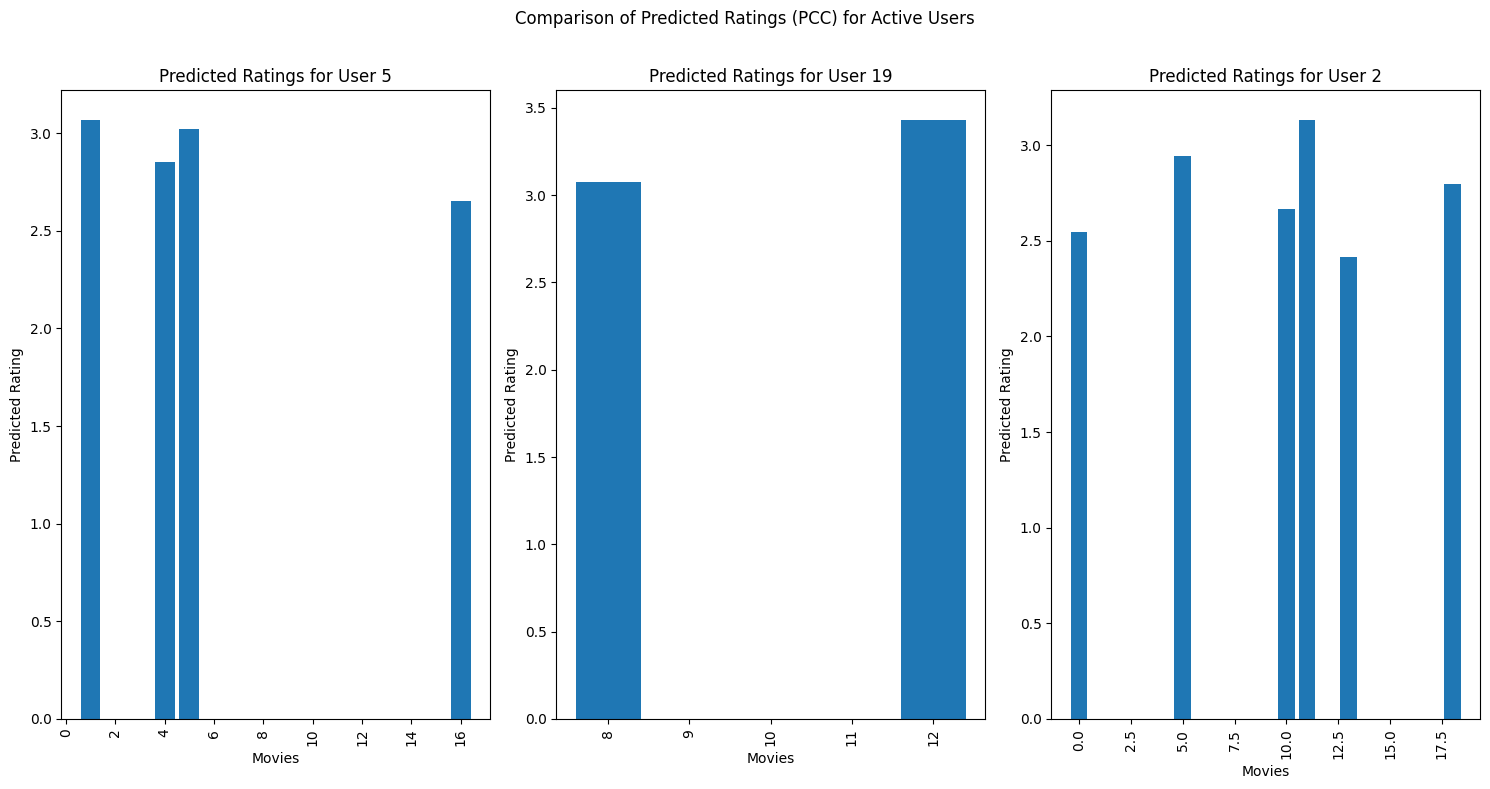

In [333]:
# Comparison Results
results = {}
for active_user_idx in active_users:
    pcc_similarities = compute_pearson_similarity(data_matrix, active_user_idx)
    top_pcc_users = top_20_percent(pcc_similarities)
    predictions_pcc = predict_ratings(data_matrix, active_user_idx, top_pcc_users)
    
    # Store results for visualization
    results[active_user_idx] = {
        "pcc": predictions_pcc
    }

# Generate Visual Charts for Comparison
plt.figure(figsize=(15, 8))
for idx, active_user_idx in enumerate(active_users):
    movies = list(results[active_user_idx]["pcc"].keys())
    pcc_ratings = list(results[active_user_idx]["pcc"].values())
    
    plt.subplot(1, len(active_users), idx + 1)
    plt.bar(movies, pcc_ratings)
    plt.title(f"Predicted Ratings for User {active_user_idx}")
    plt.xlabel("Movies")
    plt.ylabel("Predicted Rating")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.suptitle("Comparison of Predicted Ratings (PCC) for Active Users")
plt.subplots_adjust(top=0.88)
plt.show()

Case Study 2.1


Processing Target Item 1


Top 25% Closest Items
Item 12: 0.8711
Item 20: 0.8533
Item 6: 0.8507
Item 9: 0.8497

Predicted Ratings
User 2: 2.50
User 8: 2.65
User 26: 2.50
User 29: 2.99
User 33: 2.51
User 34: 1.00
User 37: 2.50
User 42: 2.66
User 44: 3.24
User 45: 2.75
User 50: 2.26
User 52: 2.50
User 56: 1.51
User 59: 3.00
User 69: 2.99
User 76: 1.99
User 77: 3.00
User 88: 4.25
User 90: 2.75
User 95: 2.50
User 96: 2.50
User 97: 2.35
User 100: 3.49
User 103: 1.99
User 108: 4.00
User 110: 2.25
User 113: 0.00
User 117: 3.35
User 127: 5.00
User 134: 3.33
User 140: 2.00
User 146: 3.01
User 149: 2.27

Discounted Similarities
Item 12: 0.7840
Item 20: 0.7679
Item 6: 0.7656
Item 9: 0.7648

Top 20% Closest Items (DS)
Item 12: 0.7840

Predicted Ratings with DS
User 2: 0.00
User 8: 1.00
User 26: 0.00
User 29: 2.00
User 33: 5.00
User 34: 1.00
User 37: 0.00
User 42: 0.00
User 44: 2.00
User 45: 3.00
User 50: 4.00
User 52: 2.00
User 56: 3.00
User 59: 3.00
User 69: 1.00
User 76: 1.00
User 77: 2.00
User

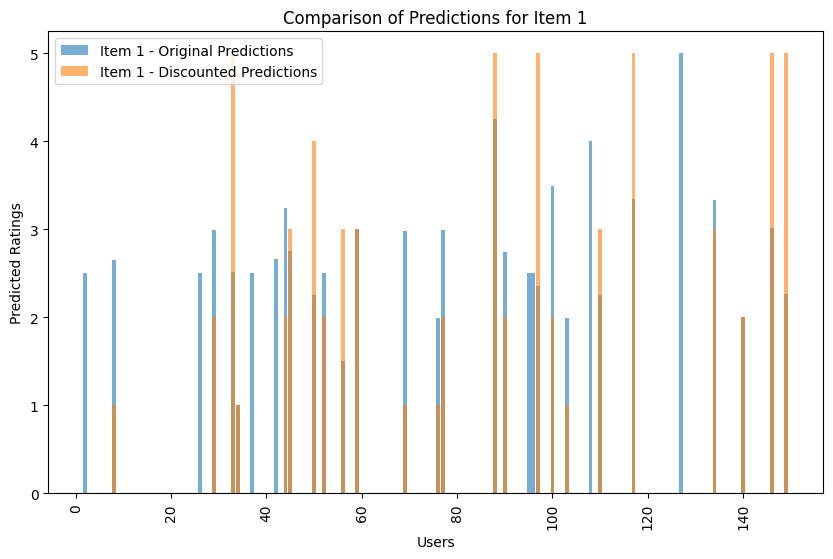

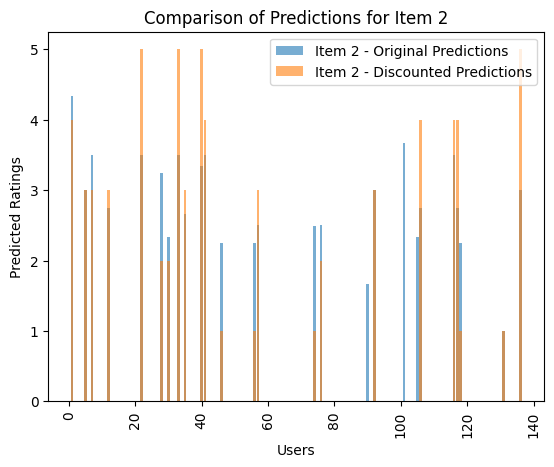

In [335]:
# 2.1.1 Compute Item-Item Cosine Similarity
def compute_cosine_similarity(item_matrix, target_item_idx):
    """Compute cosine similarity between a target item and all other items."""
    target_item = item_matrix[:, target_item_idx]
    similarities = []
    for item_idx in range(item_matrix.shape[1]):
        if item_idx != target_item_idx:
            mask = ~np.isnan(target_item) & ~np.isnan(item_matrix[:, item_idx])
            if np.sum(mask) > 0:  # Ensure at least one overlapping rating
                sim = 1 - cosine(target_item[mask], item_matrix[mask, item_idx])
                similarities.append((item_idx, sim))
            else:
                similarities.append((item_idx, 0))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# 2.1.2 Top 25% closest items
def top_25_percent(similarities):
    """Return top 25% of items based on similarity."""
    top_n = int(0.25 * len(similarities))
    return similarities[:top_n]

# 2.1.3 Predict ratings for missing items
def predict_ratings_item_based(user_matrix, target_item_idx, top_items):
    """Predict missing ratings for a target item using item-based collaborative filtering."""
    target_item = user_matrix[:, target_item_idx]
    predictions = {}
    for user_idx in range(user_matrix.shape[0]):
        if np.isnan(target_item[user_idx]):
            num, den = 0, 0
            for item_idx, sim in top_items:
                if not np.isnan(user_matrix[user_idx, item_idx]):
                    num += sim * user_matrix[user_idx, item_idx]
                    den += abs(sim)
            predictions[user_idx] = num / den if den != 0 else 0
    return predictions

# 2.1.4 Compute Discounted Similarity (DS)
def compute_discounted_similarity(similarities, beta):
    """Apply discount factor to similarities."""
    return [(item_idx, sim * beta) for item_idx, sim in similarities]

# Main Process for Target Items
target_items = [0, 1]  
beta = 0.9  # Discount factor

results = {}
for target_item_idx in target_items:
    print_formatted_output(f"Processing Target Item {target_item_idx+1}", "")
    
    # 2.1.1 Compute Cosine Similarity
    cosine_similarities = compute_cosine_similarity(data_matrix, target_item_idx)
    
    # 2.1.2 Top 25% Closest Items
    top_items = top_25_percent(cosine_similarities)
    print_formatted_output("Top 25% Closest Items", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_items]))
    
    # 2.1.3 Predict Missing Ratings
    predictions = predict_ratings_item_based(data_matrix, target_item_idx, top_items)
    print_formatted_output("Predicted Ratings", "\n".join([f"User {user}: {pred:.2f}" for user, pred in predictions.items()]))
    
    # 2.1.4 Discounted Similarity
    discounted_similarities = compute_discounted_similarity(top_items, beta)
    print_formatted_output("Discounted Similarities", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in discounted_similarities]))
    
    # 2.1.5 Top 20% Closest Items with DS
    top_discounted_items = top_25_percent(discounted_similarities)
    print_formatted_output("Top 20% Closest Items (DS)", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_discounted_items]))
    
    # 2.1.6 Predict Missing Ratings with DS
    discounted_predictions = predict_ratings_item_based(data_matrix, target_item_idx, top_discounted_items)
    print_formatted_output("Predicted Ratings with DS", "\n".join([f"User {user}: {pred:.2f}" for user, pred in discounted_predictions.items()]))
    
    # Store Results
    results[target_item_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Visualization of Predictions
plt.figure(figsize=(10, 6))
for idx, target_item_idx in enumerate(target_items):
    users = list(results[target_item_idx]["predictions"].keys())
    ratings = list(results[target_item_idx]["predictions"].values())
    discounted_ratings = list(results[target_item_idx]["discounted_predictions"].values())
    
    plt.bar(users, ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Original Predictions")
    plt.bar(users, discounted_ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Discounted Predictions")
    plt.title(f"Comparison of Predictions for Item {target_item_idx+1}")
    plt.xlabel("Users")
    plt.ylabel("Predicted Ratings")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()


Case Study 2.2


Processing Target Item 1


Top 20% Closest Items
Item 19: 0.2019
Item 12: 0.1741
Item 9: 0.1067

Predicted Ratings
User 2: 3.08
User 8: 1.63
User 26: 2.52
User 29: 2.63
User 33: 3.94
User 34: 1.54
User 37: 2.95
User 42: 4.52
User 44: 2.25
User 45: 2.38
User 50: 3.16
User 52: 1.49
User 56: 2.16
User 59: 3.85
User 69: 2.74
User 76: 0.87
User 77: 1.82
User 88: 5.02
User 90: 1.87
User 95: 1.52
User 96: 3.08
User 97: 2.46
User 100: 2.88
User 103: 1.25
User 108: 2.95
User 110: 3.44
User 113: 2.95
User 117: 4.38
User 127: 1.22
User 134: 3.25
User 140: 2.25
User 146: 4.38
User 149: 3.30

Discounted Similarities
Item 19: 0.1817
Item 12: 0.1567
Item 9: 0.0960

Top 20% Closest Items (DS)


Predicted Ratings with DS
User 2: 2.95
User 8: 2.95
User 26: 2.95
User 29: 2.95
User 33: 2.95
User 34: 2.95
User 37: 2.95
User 42: 2.95
User 44: 2.95
User 45: 2.95
User 50: 2.95
User 52: 2.95
User 56: 2.95
User 59: 2.95
User 69: 2.95
User 76: 2.95
User 77: 2.95
User 88: 2.95
User 90: 2.95
User 95: 2.95
User 96

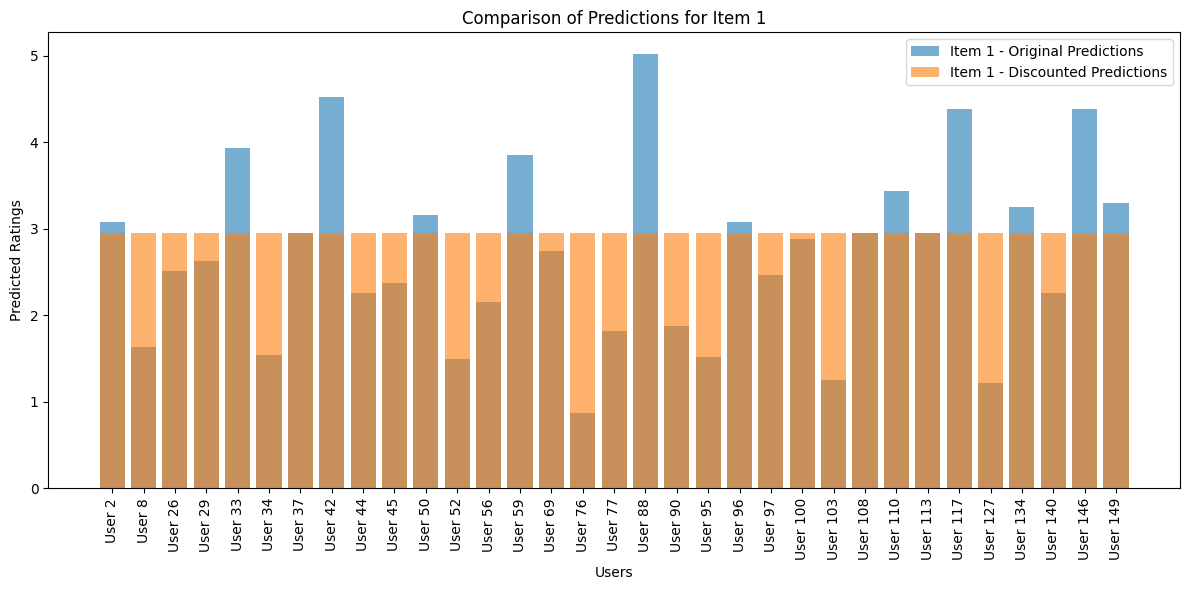

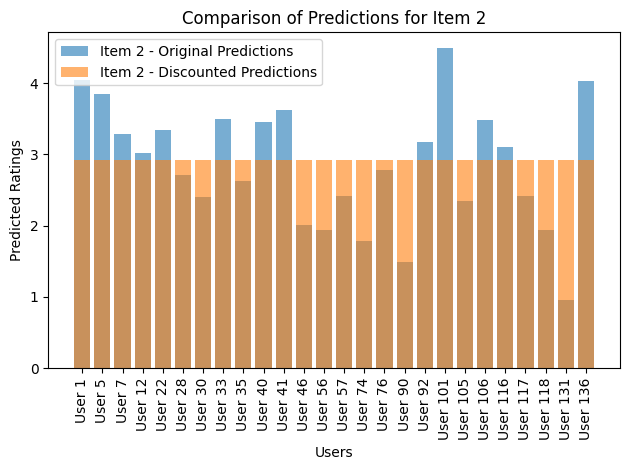

In [336]:
# 2.2.1 Compute Item-Item Mean-Centered Cosine Similarity
def compute_mean_centered_cosine_similarity(item_matrix, target_item_idx):
    """Compute cosine similarity with mean-centering adjustment between target item and all other items."""
    target_item = item_matrix[:, target_item_idx]
    target_item_centered = target_item - np.nanmean(target_item)
    similarities = []
    for item_idx in range(item_matrix.shape[1]):
        if item_idx != target_item_idx:
            item = item_matrix[:, item_idx]
            item_centered = item - np.nanmean(item)
            mask = ~np.isnan(target_item_centered) & ~np.isnan(item_centered)
            if np.sum(mask) > 0:  # Ensure at least one overlapping rating
                sim = 1 - cosine(target_item_centered[mask], item_centered[mask])
                similarities.append((item_idx, sim))
            else:
                similarities.append((item_idx, 0))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Top 20% closest items
def top_20_percent(similarities):
    """Return top 20% of items based on similarity."""
    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

# Predict ratings for missing items with mean-centering
def predict_ratings_item_based_mean_centered(user_matrix, target_item_idx, top_items):
    """Predict missing ratings for a target item using item-based collaborative filtering with mean-centering."""
    target_item = user_matrix[:, target_item_idx]
    target_mean = np.nanmean(target_item)
    predictions = {}
    for user_idx in range(user_matrix.shape[0]):
        if np.isnan(target_item[user_idx]):
            num, den = 0, 0
            for item_idx, sim in top_items:
                item = user_matrix[:, item_idx]
                item_mean = np.nanmean(item)
                if not np.isnan(item[user_idx]):
                    num += sim * (item[user_idx] - item_mean)
                    den += abs(sim)
            predictions[user_idx] = target_mean + (num / den if den != 0 else 0)
    return predictions

# Compute Discounted Similarity (DS)
def compute_discounted_similarity(similarities, beta):
    """Apply discount factor to similarities."""
    return [(item_idx, sim * beta) for item_idx, sim in similarities]

# Main Process for Target Items
target_items = [0, 1]  
beta = 0.9  # Discount factor

results = {}
for target_item_idx in target_items:
    print_formatted_output(f"Processing Target Item {target_item_idx+1}", "")
    
    # 2.2.1 Compute Mean-Centered Cosine Similarity
    mean_centered_similarities = compute_mean_centered_cosine_similarity(data_matrix, target_item_idx)
    
    # 2.2.2 Top 20% Closest Items
    top_items = top_20_percent(mean_centered_similarities)
    print_formatted_output("Top 20% Closest Items", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_items]))
    
    # 2.2.3 Predict Missing Ratings
    predictions = predict_ratings_item_based_mean_centered(data_matrix, target_item_idx, top_items)
    print_formatted_output("Predicted Ratings", "\n".join([f"User {user}: {pred:.2f}" for user, pred in predictions.items()]))
    
    # 2.2.4 Discounted Similarity
    discounted_similarities = compute_discounted_similarity(top_items, beta)
    print_formatted_output("Discounted Similarities", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in discounted_similarities]))
    
    # 2.2.5 Top 20% Closest Items with DS
    top_discounted_items = top_20_percent(discounted_similarities)
    print_formatted_output("Top 20% Closest Items (DS)", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_discounted_items]))
    
    # 2.2.6 Predict Missing Ratings with DS
    discounted_predictions = predict_ratings_item_based_mean_centered(data_matrix, target_item_idx, top_discounted_items)
    print_formatted_output("Predicted Ratings with DS", "\n".join([f"User {user}: {pred:.2f}" for user, pred in discounted_predictions.items()]))
    
    # Store Results
    results[target_item_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Visualization of Predictions
plt.figure(figsize=(12, 6))
for idx, target_item_idx in enumerate(target_items):
    users = list(results[target_item_idx]["predictions"].keys())
    ratings = list(results[target_item_idx]["predictions"].values())
    discounted_ratings = list(results[target_item_idx]["discounted_predictions"].values())
    
    plt.bar(np.arange(len(users)), ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Original Predictions")
    plt.bar(np.arange(len(users)), discounted_ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Discounted Predictions")
    plt.title(f"Comparison of Predictions for Item {target_item_idx+1}")
    plt.xlabel("Users")
    plt.ylabel("Predicted Ratings")
    plt.xticks(np.arange(len(users)), [f"User {user}" for user in users], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


Case Study 2.3


Processing Target Item 1


Top 20% Closest Items
Item 19: 0.2022
Item 12: 0.1746
Item 9: 0.1063

Predicted Ratings
User 2: 3.00
User 8: 1.76
User 26: 2.34
User 29: 2.76
User 33: 3.92
User 34: 1.54
User 37: 0.00
User 42: 4.34
User 44: 2.38
User 45: 2.36
User 50: 3.14
User 52: 1.62
User 56: 2.14
User 59: 3.84
User 69: 2.72
User 76: 1.00
User 77: 1.80
User 88: 5.00
User 90: 2.00
User 95: 1.34
User 96: 3.00
User 97: 2.45
User 100: 2.86
User 103: 1.38
User 108: 0.00
User 110: 3.42
User 113: 0.00
User 117: 4.36
User 127: 1.00
User 134: 3.38
User 140: 2.38
User 146: 4.36
User 149: 3.28

Discounted Similarities
Item 19: 0.1820
Item 12: 0.1572
Item 9: 0.0957

Top 20% Closest Items (DS)


Predicted Ratings with DS
User 2: 0.00
User 8: 0.00
User 26: 0.00
User 29: 0.00
User 33: 0.00
User 34: 0.00
User 37: 0.00
User 42: 0.00
User 44: 0.00
User 45: 0.00
User 50: 0.00
User 52: 0.00
User 56: 0.00
User 59: 0.00
User 69: 0.00
User 76: 0.00
User 77: 0.00
User 88: 0.00
User 90: 0.00
User 95: 0.00
User 96

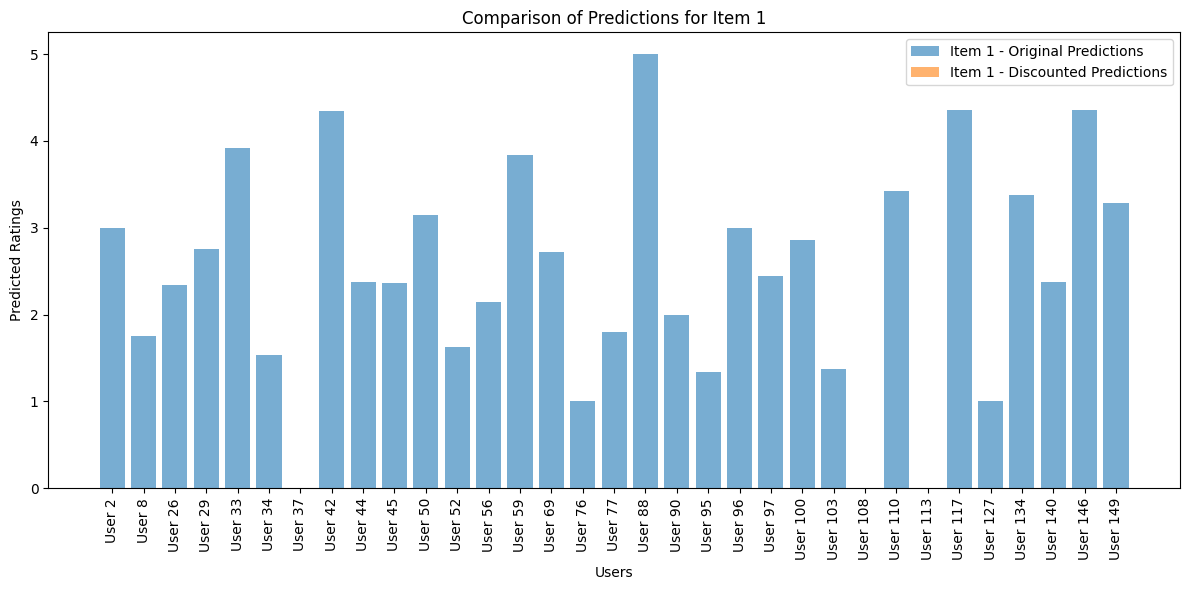

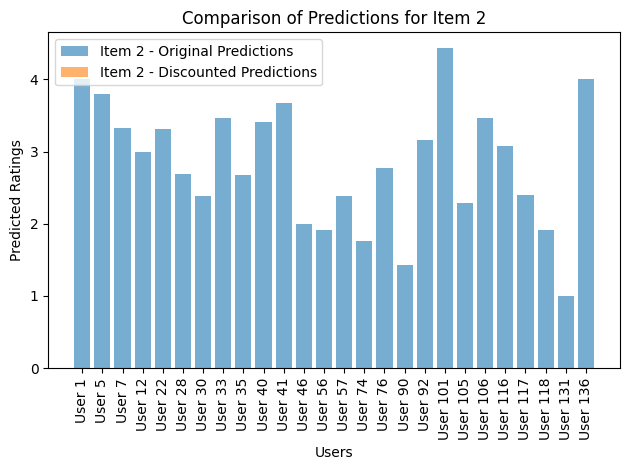

In [329]:
# 2.3.1 Compute Item-Item Pearson Correlation Coefficient (PCC)
def compute_pearson_similarity(item_matrix, target_item_idx):
    """Compute PCC between a target item and all other items."""
    target_item = item_matrix[:, target_item_idx]
    similarities = []
    for item_idx in range(item_matrix.shape[1]):
        if item_idx != target_item_idx:
            mask = ~np.isnan(target_item) & ~np.isnan(item_matrix[:, item_idx])
            if np.sum(mask) > 1:  # Ensure enough valid ratings for PCC
                corr, _ = pearsonr(target_item[mask], item_matrix[mask, item_idx])
                similarities.append((item_idx, corr))
            else:
                similarities.append((item_idx, 0))
    return sorted(similarities, key=lambda x: x[1], reverse=True)

# Top 20% closest items
def top_20_percent(similarities):
    """Return top 20% of items based on similarity."""
    top_n = int(0.2 * len(similarities))
    return similarities[:top_n]

# Predict ratings for missing items
def predict_ratings_pcc(user_matrix, target_item_idx, top_items):
    """Predict missing ratings for a target item using PCC."""
    target_item = user_matrix[:, target_item_idx]
    predictions = {}
    for user_idx in range(user_matrix.shape[0]):
        if np.isnan(target_item[user_idx]):
            num, den = 0, 0
            for item_idx, sim in top_items:
                if not np.isnan(user_matrix[user_idx, item_idx]):
                    num += sim * user_matrix[user_idx, item_idx]
                    den += abs(sim)
            predictions[user_idx] = num / den if den != 0 else 0
    return predictions

# Compute Discounted Similarity (DS)
def compute_discounted_similarity(similarities, beta):
    """Apply discount factor to similarities."""
    return [(item_idx, sim * beta) for item_idx, sim in similarities]

# Main Process for Target Items
target_items = [0, 1]  # Example: Movie 1 (I1), Movie 2 (I2)
beta = 0.9  # Discount factor

results = {}
for target_item_idx in target_items:
    print_formatted_output(f"Processing Target Item {target_item_idx+1}", "")
    
    # 2.3.1 Compute PCC Similarity
    pcc_similarities = compute_pearson_similarity(data_matrix, target_item_idx)
    
    # 2.3.2 Top 20% Closest Items
    top_items = top_20_percent(pcc_similarities)
    print_formatted_output("Top 20% Closest Items", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_items]))
    
    # 2.3.3 Predict Missing Ratings
    predictions = predict_ratings_pcc(data_matrix, target_item_idx, top_items)
    print_formatted_output("Predicted Ratings", "\n".join([f"User {user}: {pred:.2f}" for user, pred in predictions.items()]))
    
    # 2.3.4 Discounted Similarity
    discounted_similarities = compute_discounted_similarity(top_items, beta)
    print_formatted_output("Discounted Similarities", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in discounted_similarities]))
    
    # 2.3.5 Top 20% Closest Items with DS
    top_discounted_items = top_20_percent(discounted_similarities)
    print_formatted_output("Top 20% Closest Items (DS)", "\n".join([f"Item {item+1}: {sim:.4f}" for item, sim in top_discounted_items]))
    
    # 2.3.6 Predict Missing Ratings with DS
    discounted_predictions = predict_ratings_pcc(data_matrix, target_item_idx, top_discounted_items)
    print_formatted_output("Predicted Ratings with DS", "\n".join([f"User {user}: {pred:.2f}" for user, pred in discounted_predictions.items()]))
    
    # Store Results
    results[target_item_idx] = {
        "predictions": predictions,
        "discounted_predictions": discounted_predictions
    }

# Visualization of Predictions
plt.figure(figsize=(12, 6))
for idx, target_item_idx in enumerate(target_items):
    users = list(results[target_item_idx]["predictions"].keys())
    ratings = list(results[target_item_idx]["predictions"].values())
    discounted_ratings = list(results[target_item_idx]["discounted_predictions"].values())
    
    plt.bar(np.arange(len(users)), ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Original Predictions")
    plt.bar(np.arange(len(users)), discounted_ratings, alpha=0.6, label=f"Item {target_item_idx+1} - Discounted Predictions")
    plt.title(f"Comparison of Predictions for Item {target_item_idx+1}")
    plt.xlabel("Users")
    plt.ylabel("Predicted Ratings")
    plt.xticks(np.arange(len(users)), [f"User {user}" for user in users], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
